## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Data/Historical Restaurant Reviews.tsv', delimiter = '\t')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Data Pre-processing
1. Dropping special characters and numbers
2. Convert all word to small case
3. Dropping stop words
4. Stemming

In [4]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [5]:
# download only one time
# nltk.download('stopwords')
# nltk.download('punkt')

ps = PorterStemmer()

stopwords = stopwords.words('english')

In [6]:
# making string corpus
corpus=[]

for i in range(0, 900):
    # re.sub(pattern, repl, string)
    # [^a-zA-Z] regex expression mean -> match all strings that contain a letter
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
# tokenize the whole data set
tokens = []
for comment in corpus:
    tokens += nltk.word_tokenize(comment)

In [8]:
def wordCount(txt_list):
    wordfreq = {'word':[],'freq':[]}
    for word in txt_list:
        if word not in wordfreq['word']:
            wordfreq['word'].append(word)                 
            wordfreq['freq'].append(txt_list.count(word))   
    count = pd.DataFrame(wordfreq)
    # sort_values in df
    count.sort_values('freq', inplace=True, ascending=False)
    return count

In [9]:
counts = wordCount(tokens)
counts

,word,freq
79,food,114
2,place,99
4,good,92
40,servic,82
18,great,70
...,...,...
249,wave,1
898,happen,1
248,struggl,1
901,starv,1


In [10]:
def wordCloud(tokens):
    from wordcloud import WordCloud
    wordcloud = WordCloud(width = 600, height = 600,
                    background_color ='white',
                    min_font_size = 10).generate(" ".join(tokens))

    # plot the WordCloud image                      
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

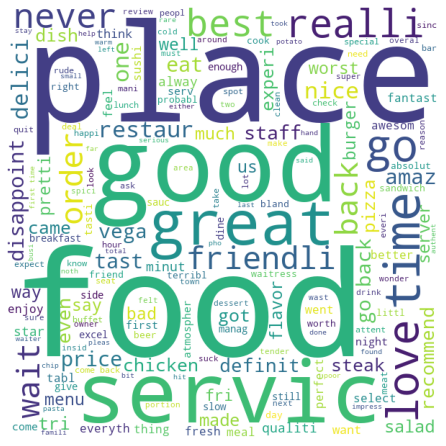

In [11]:
wordCloud(tokens)

## Data transformation
Transform data into useful representation as a bag of words 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [13]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [14]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'BoW.pkl'
pickle.dump(cv, open(bow_path, "wb"))

## Dividing dataset into training and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

### Model fitting (Logisitic Regression)

In [16]:
from sklearn.linear_model import LogisticRegression
LogisticModel = LogisticRegression(random_state = 0)
LogisticModel.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Model fitting (Naive Bayes)

In [17]:
from sklearn.naive_bayes import GaussianNB
NBModel = GaussianNB()
NBModel.fit(X_train, y_train)

GaussianNB()

## Model performance

In [18]:
y_pred = LogisticModel.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[44 13]
 [14 64]]


0.8

In [19]:
y_pred = NBModel.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[50  7]
 [36 42]]


0.6814814814814815

In [20]:
# Exporting model to later use in prediction
import joblib

# Logistic Regression Model
# joblib.dump(LogisticModel, 'Models/LR_Classifier_Model') 

# Naive Bayes Model
# joblib.dump(NBModel, 'Models/NB_Classifier_Model') 